In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from matplotlib import pyplot as plt

import yfinance as yf

# Load stock info

In [2]:
# Download stock info
stock_info = yf.download("NVDA", start="2021-01-01", end="2021-08-16")
stock_info

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,131.365005,131.509995,129.149994,130.550003,130.475052,19242400
2021-01-04,131.042496,136.524994,129.625000,131.134995,131.059723,56064000
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.970551,32276000
2021-01-06,132.225006,132.449997,125.860001,126.144997,126.072578,58042400
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.363388,46148000
...,...,...,...,...,...,...
2021-08-09,204.460007,205.080002,201.429993,202.949997,202.949997,14644300
2021-08-10,203.220001,204.300003,198.350006,199.360001,199.360001,17923800
2021-08-11,200.429993,200.490005,194.300003,196.990005,196.990005,18592500


In [3]:
# Load the data and convert from pandas dataframe to numpy array
stock_close_data = stock_info["Close"]
stock_close_data = stock_close_data.to_numpy()
stock_close_data

array([130.55000305, 131.13499451, 134.04750061, 126.14499664,
       133.44000244, 132.76750183, 136.21499634, 134.84750366,
       135.31750488, 132.00250244, 128.59500122, 130.25250244,
       133.65750122, 138.67500305, 137.125     , 136.53250122,
       134.35249329, 129.17750549, 130.50999451, 129.89750671,
       132.36999512, 135.56750488, 135.30499268, 136.64250183,
       135.91000366, 144.38749695, 142.63250732, 147.64250183,
       152.50750732, 149.61250305, 153.30250549, 149.05999756,
       148.28999329, 149.26499939, 143.55749512, 141.41999817,
       144.99000549, 133.07499695, 137.14500427, 138.41749573,
       134.0625    , 128.04750061, 123.70249939, 124.61499786,
       115.93250275, 125.20249939, 124.68250275, 129.93499756,
       128.55999756, 131.9125061 , 132.9125061 , 133.4125061 ,
       127.22499847, 128.45750427, 131.86250305, 130.70750427,
       126.43000031, 125.35250092, 128.39250183, 129.48249817,
       128.71749878, 133.48249817, 138.11749268, 139.87

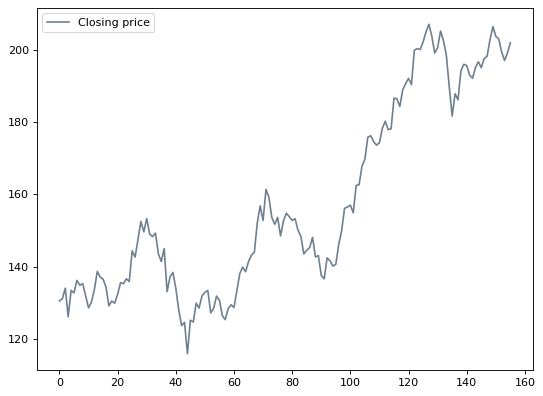

In [4]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.legend()
plt.show()

# Smooth data

In [20]:
# Smaller N -> More accurate
# Larger N -> More smooth
N = 25
window = np.blackman(N)
smoothed_data = np.convolve(window/window.sum(), stock_close_data, mode='same')

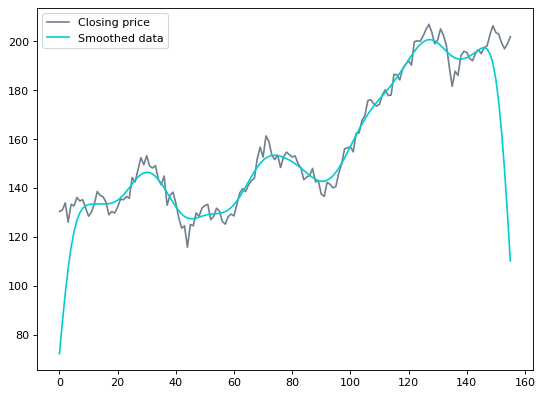

In [21]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.legend()
plt.show()

# Find local maxima

In [22]:
# Find local maxima
peaks = argrelextrema(smoothed_data, np.greater)[0]
stock_info.iloc[peaks]["Close"]

Date
2021-01-21    138.675003
2021-02-16    153.302505
2021-04-20    151.712494
2021-07-06    206.985001
2021-08-02    197.500000
Name: Close, dtype: float64

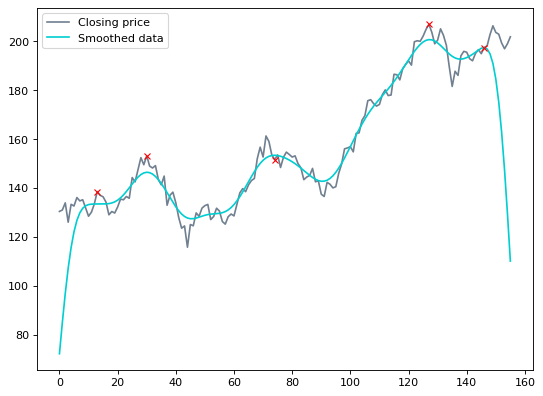

In [23]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(peaks, stock_close_data[peaks], "x", color="red")
plt.legend()
plt.show()

# Find local minima

In [24]:
# Find local minima
bottoms = argrelextrema(smoothed_data, np.less)[0]
stock_info.iloc[bottoms]["Close"]

Date
2021-01-25    136.532501
2021-03-09    125.202499
2021-05-12    137.585007
2021-07-21    194.100006
Name: Close, dtype: float64

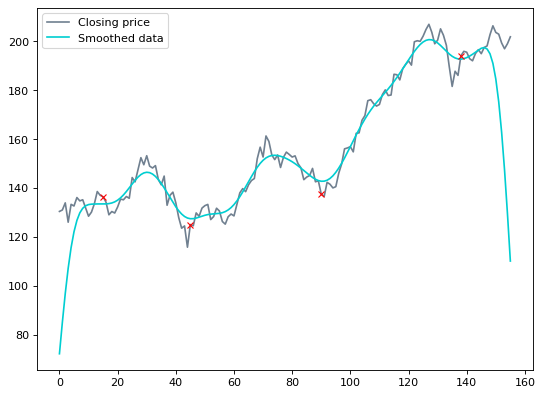

In [25]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(bottoms, stock_close_data[bottoms], "x", color="red")
plt.legend()
plt.show()

# Final result

In [26]:
# Peaks
stock_info.iloc[peaks]["Close"]

Date
2021-01-21    138.675003
2021-02-16    153.302505
2021-04-20    151.712494
2021-07-06    206.985001
2021-08-02    197.500000
Name: Close, dtype: float64

In [27]:
# Bottoms
stock_info.iloc[bottoms]["Close"]

Date
2021-01-25    136.532501
2021-03-09    125.202499
2021-05-12    137.585007
2021-07-21    194.100006
Name: Close, dtype: float64

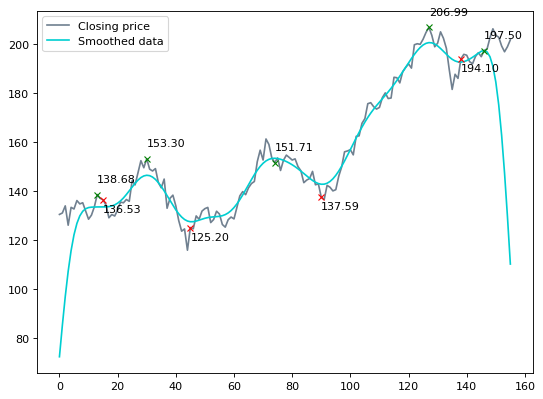

In [30]:
# Plot graph
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(peaks, stock_close_data[peaks], "x", color="green")
plt.plot(bottoms, stock_close_data[bottoms], "x", color="red")
for index, x_coord in enumerate(peaks):
    plt.annotate("{:.2f}".format(stock_close_data[x_coord]), (x_coord, stock_close_data[x_coord]+5))
for index, x_coord in enumerate(bottoms):
    plt.annotate("{:.2f}".format(stock_close_data[x_coord]), (x_coord, stock_close_data[x_coord]-5))
plt.legend()
plt.show()